In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [98]:
df = pd.read_csv('fraudTrain.csv', index_col=0)
d_test = pd.read_csv('fraudTest.csv', index_col=0)

In [99]:
df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [100]:
# By looking on the data set, i think the name are not important and trans_num and unix_time are unique values
df = df.drop(columns=['first', 'last','trans_num','unix_time'])
d_test = d_test.drop(columns=['first', 'last','trans_num','unix_time'])

In [101]:
df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0


In [102]:
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (1296675, 18)


In [103]:
# Handle missing values (if any)
df.dropna(inplace=True)
d_test.dropna(inplace=True)

In [104]:
# Remove duplicates (if any)
df.drop_duplicates(inplace=True)
d_test.drop_duplicates(inplace=True)

In [105]:
print("Shape of the DataFrame:", df.shape)
print("Shape of the DataFrame:", d_test.shape)
df_length = df.shape[0]

Shape of the DataFrame: (1296675, 18)
Shape of the DataFrame: (555719, 18)


In [106]:
print(df.describe())

             cc_num           amt           zip           lat          long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01 -9.022634e+01   
std    1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00  1.375908e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01 -9.679800e+01   
50%    3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01 -6.795030e+01   

           city_pop     merch_lat    merch_long      is_fraud  
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  
mean   8.882444e+04  3.853734e+01 -9.022646e+01  5.788652e-03  
std    3.019564e+05  5.109788e+00  1.377109e+01  7.586269e-02  
min    2.300000e+01  1.902779e+0

In [107]:
fraud_count = df['is_fraud'].sum()
print("Number of fraudulent transactions:", fraud_count)
print("Number of not fraudulent transactions:", df_length - fraud_count)
print("Ratio of fraudulent transactions:", (fraud_count/df_length) * 100 , "%")

Number of fraudulent transactions: 7506
Number of not fraudulent transactions: 1289169
Ratio of fraudulent transactions: 0.5788651743883394 %


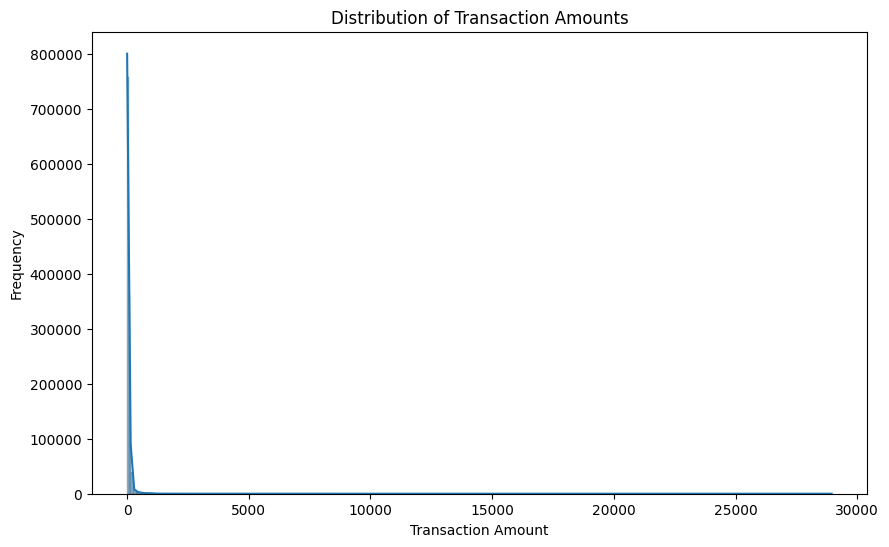

In [108]:
# Example: Histogram of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['amt'], bins=500, kde=True)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.show()

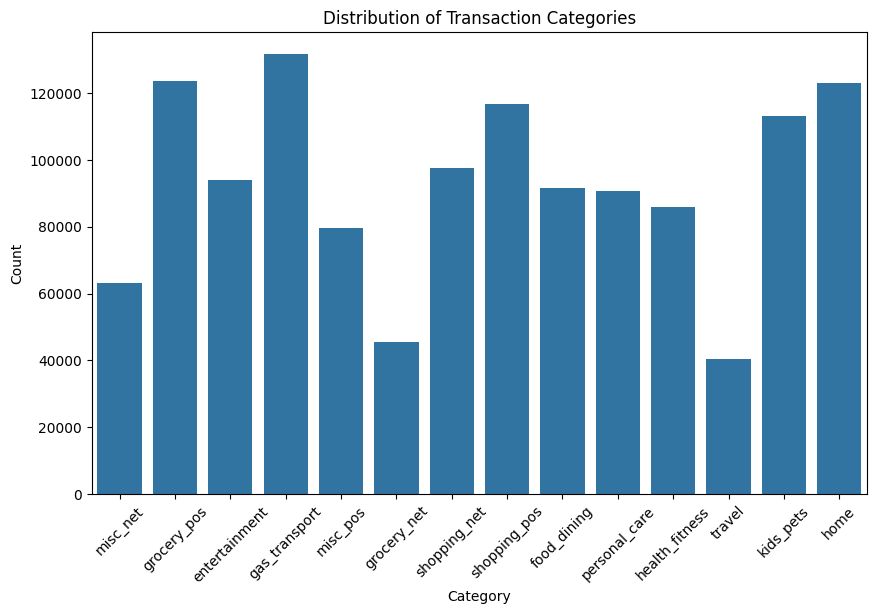

In [109]:
# Example: Bar plot of transaction categories
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Transaction Categories')
plt.xticks(rotation=45)
plt.show()

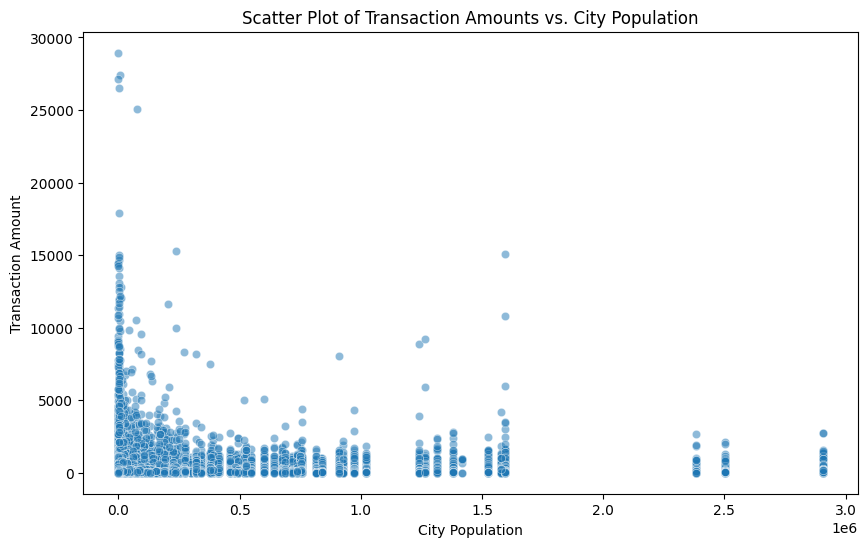

In [110]:
# Example: Scatter plot of transaction amounts vs. city population
plt.figure(figsize=(10, 6))
sns.scatterplot(x='city_pop', y='amt', data=df, alpha=0.5)
plt.xlabel('City Population')
plt.ylabel('Transaction Amount')
plt.title('Scatter Plot of Transaction Amounts vs. City Population')
plt.show()

# Note that on the below graph we see some outliers that want to be removed

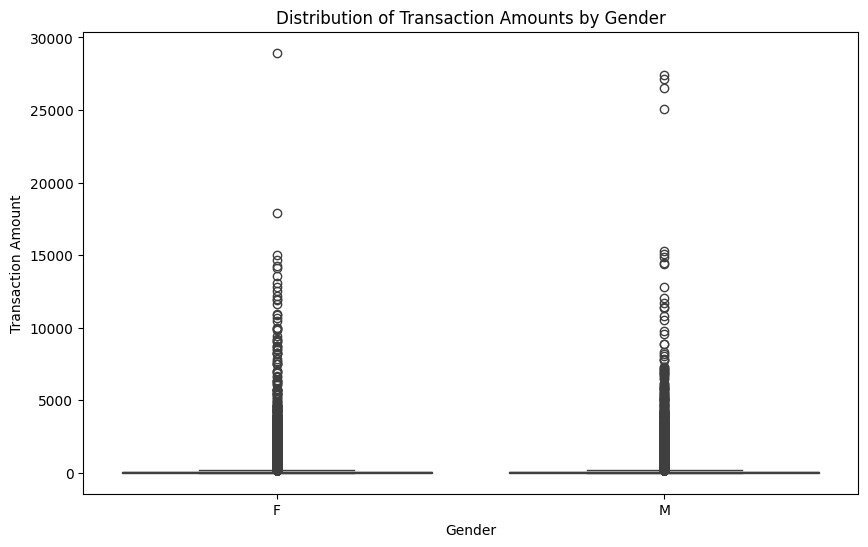

In [111]:
# Example: Box plot of transaction amounts by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='amt', data=df)
plt.xlabel('Gender')
plt.ylabel('Transaction Amount')
plt.title('Distribution of Transaction Amounts by Gender')
plt.show()


# Note that on the below graph we see some outliers that want to be removed

In [112]:
df = df[df['amt'] <= 15000]

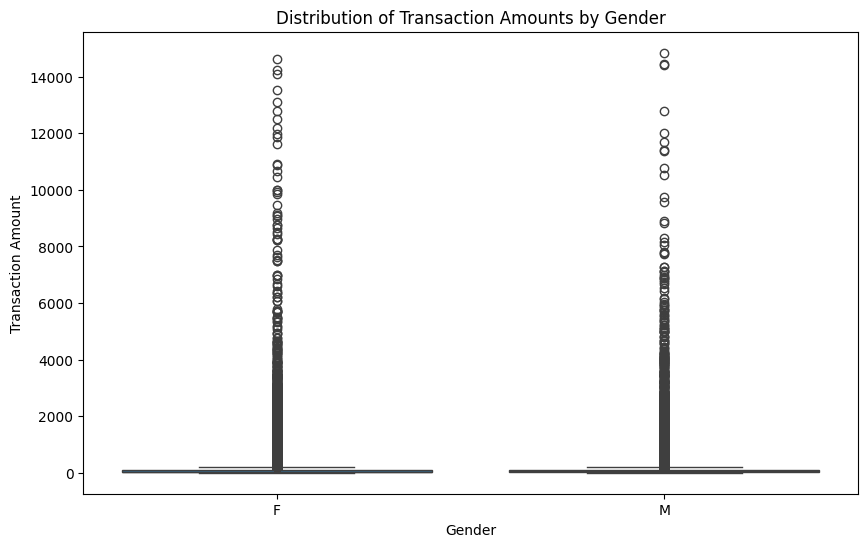

In [113]:
# Example: Box plot of transaction amounts by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='amt', data=df)
plt.xlabel('Gender')
plt.ylabel('Transaction Amount')
plt.title('Distribution of Transaction Amounts by Gender')
plt.show()

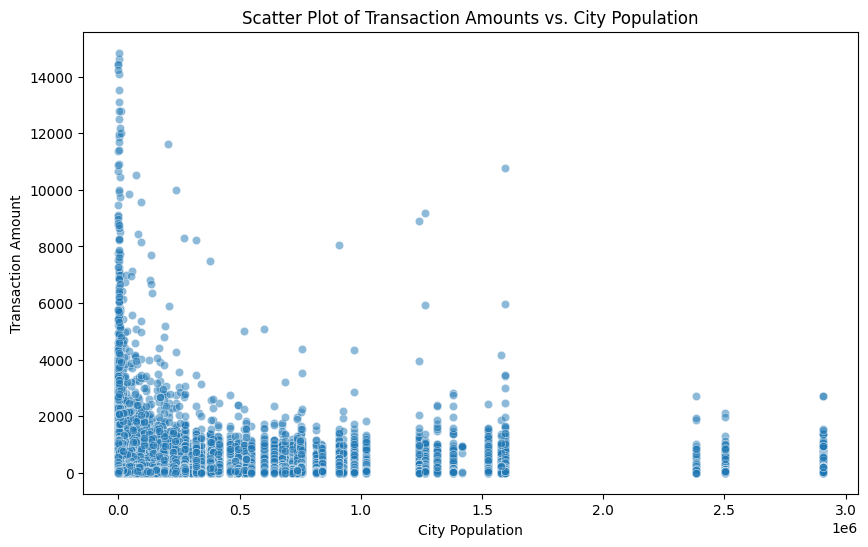

In [114]:
# Example: Scatter plot of transaction amounts vs. city population
plt.figure(figsize=(10, 6))
sns.scatterplot(x='city_pop', y='amt', data=df, alpha=0.5)
plt.xlabel('City Population')
plt.ylabel('Transaction Amount')
plt.title('Scatter Plot of Transaction Amounts vs. City Population')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22984\2979601733.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


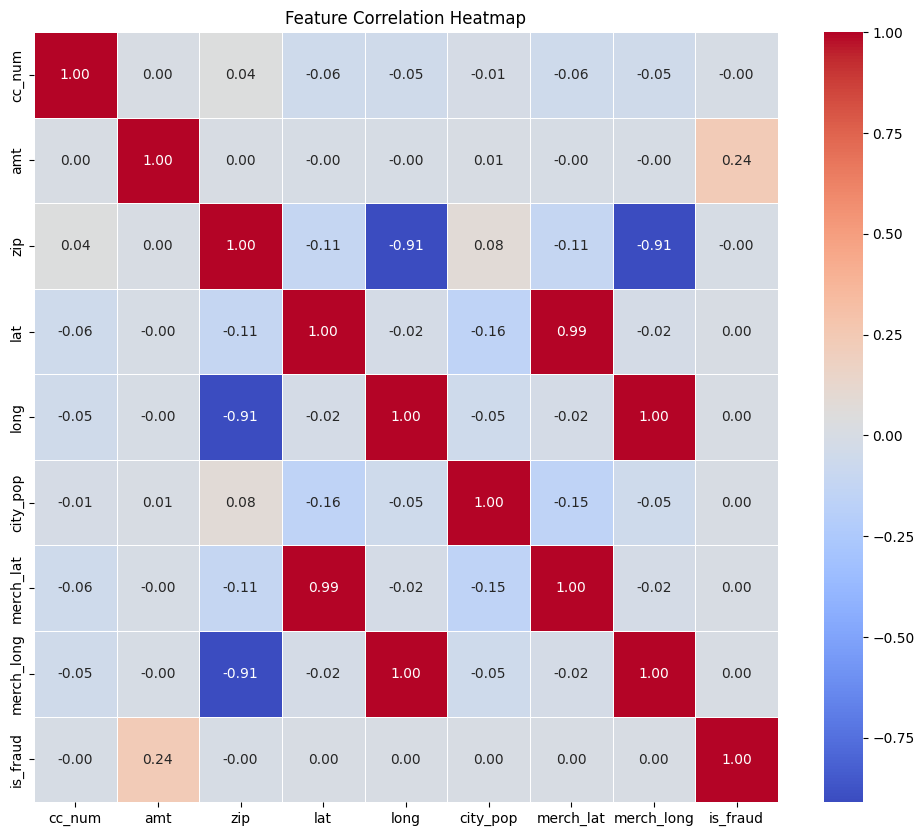

In [115]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [116]:
# I think we can remove lat or merch_lat because they are highly correlated so they can cause multicollinearity 
# decide after the model is done
df = df.drop(columns=['long','lat','zip'])
d_test = d_test.drop(columns=['long','lat','zip'])

In [117]:
df = df.drop(columns=['trans_date_trans_time'])
d_test = d_test.drop(columns=['trans_date_trans_time'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22984\2979601733.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


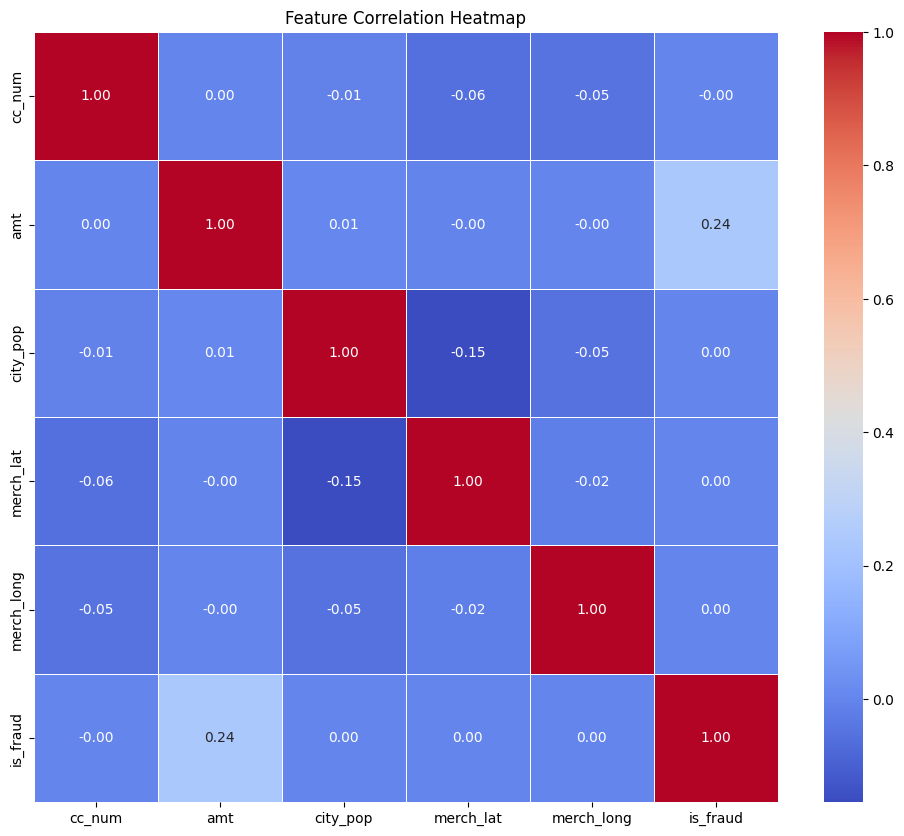

In [118]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [157]:
X_train = df.drop(columns=['is_fraud'])
y_train = df['is_fraud']

X_test = d_test.drop(columns=['is_fraud'])
y_test = d_test['is_fraud']

In [120]:
df.head(3)

,cc_num,merchant,category,amt,gender,street,city,state,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0


In [121]:
# from sklearn.preprocessing import OneHotEncoder

# # Assuming X_train contains your feature matrix with categorical variables
# # Initialize OneHotEncoder with sparse output and handle_unknown='ignore'
# encoder = OneHotEncoder(sparse=True, handle_unknown='ignore')

# # Fit and transform the encoder on X_train
# X_train_encoded = encoder.fit_transform(X_train)

# # Transform X_test using the fitted encoder
# X_test_encoded = encoder.transform(X_test)


c:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [122]:
# # Calculate the correlation matrix
# corr_matrix = X_train_encoded.corr()

# # Create a heatmap
# plt.figure(figsize=(12, 10))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title('Feature Correlation Heatmap')
# plt.show()

# print(type(X_test_encoded.toarray()))


In [123]:
# Assuming X contains all features and y contains the target variable 'is_fraud'
# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.0000000001, random_state=42, stratify=y)

In [124]:
# from sklearn.preprocessing import OneHotEncoder

# # Assuming X_train contains your feature matrix with categorical variables
# # Initialize OneHotEncoder with sparse output
# encoder = OneHotEncoder(sparse=True)

# # Fit and transform the encoder on X_train
# X_train_encoded = encoder.fit_transform(X_train)

# # Now, X_train_encoded contains a sparse matrix

In [125]:
# # Define the Random Forest classifier
# rf_classifier = RandomForestClassifier(random_state=42)

In [126]:

# # Define the hyperparameter grid for Grid Search
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Perform Grid Search
# grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

In [127]:
# grid_search.fit(X_train, y_train)

In [186]:
# Instantiate the logistic regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=10000000, dual=False, penalty='l1', C=0.01, solver='liblinear')

In [158]:
X_train_encoded =  df[['cc_num','amt','city_pop','merch_lat','merch_long']] 
X_test_encoded =  d_test[['cc_num','amt','city_pop','merch_lat','merch_long']] 

In [145]:
# Train the model on the training data
log_reg_model.fit(X_train_encoded, y_train)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [146]:
# X_test_encoded = encoder.fit_transform(X_test)

In [147]:
# Predict the target variable on the testing data
y_pred = log_reg_model.predict(X_test_encoded)


In [148]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9961401355721147


In [149]:
# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [150]:
print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}")
print(f"\n Precision: {precision_score(y_test, y_pred)}")
print(f"\n Recall: {recall_score(y_test, y_pred)}")
print(f"\n F1 Score: {f1_score(y_test, y_pred)}")


 Accuaracy: 0.9961401355721147

 Precision: 0.0


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 Recall: 0.0

 F1 Score: 0.0


In [151]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[553574      0]
 [  2145      0]]


In [152]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [153]:
# X_train, X_test, y_train, y_test = train_test_split(X_train_encoded, df['is_fraud'], test_size=0.2, random_state=42)

In [161]:
rf_classifier.fit(X_train_encoded,y_train)

RandomForestClassifier(random_state=42)

In [162]:
y_pred = rf_classifier.predict(X_test_encoded)

In [163]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9957298562762835
Confusion Matrix:
 [[553064    510]
 [  1863    282]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.36      0.13      0.19      2145

    accuracy                           1.00    555719
   macro avg       0.68      0.57      0.59    555719
weighted avg       0.99      1.00      0.99    555719



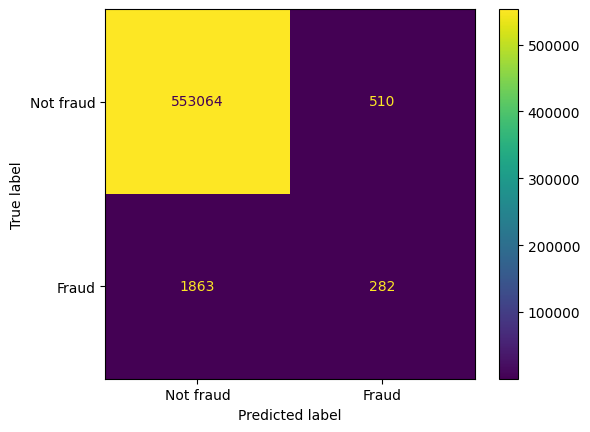

In [166]:
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not fraud", "Fraud"])
display.plot()
plt.show()

In [178]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler and transform the features
X_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.fit_transform(X_test_encoded)

print(X_scaled[0])

[-0.31669358 -0.43852272 -0.2825877  -0.49435683  0.59386511]


In [187]:
# Train the model on the training data
log_reg_model.fit(X_train_encoded, y_train)

In [179]:
# Predict the target variable on the testing data
y_pred_log = log_reg_model.predict(X_test_scaled)

In [180]:
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Accuracy: 0.9954887272164529
Confusion Matrix:
 [[553212    362]
 [  2145      0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

